In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$y_g$')

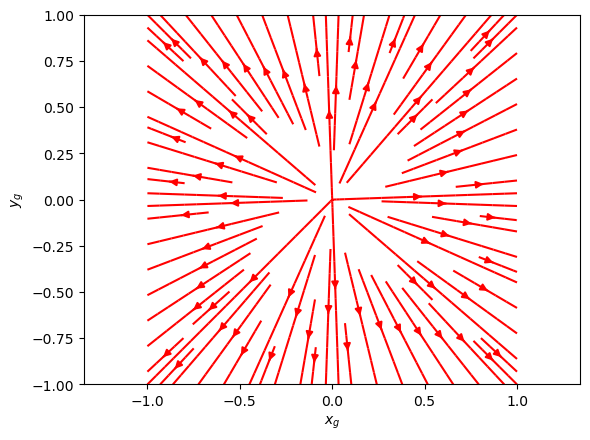

In [95]:
def Ex(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)

def Ey(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.sin(theta)

def Bx(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return -1*np.sin(theta)

def By(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)


xmin = -1
ymin= -1
xmax = 1
ymax = 1
xgrid = np.linspace(xmin, xmax, 300)
ygrid = np.linspace(ymin, ymax, 300)

X, Y = np.meshgrid(xgrid, ygrid)

Ex_test = Ex(X,Y)
Ey_test = Ey(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Ex_test, Ey_test, color='red')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')


Text(0, 0.5, '$y_g$')

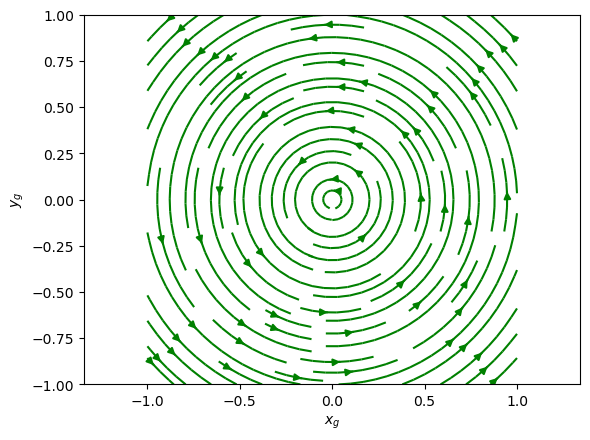

In [96]:
Bx_test = Bx(X,Y)
By_test = By(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Bx_test, By_test, color='green')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')

In [97]:
W = 1 # KeV
W = W*1.6022e-19*1000 # convert to jouls
e = 1.6022e-19 # proton charge
dl = 0.01 # thickness of slab
l = .2 # distance from point source to the slab
m = 1.6726e-27  # proton mass

def alpha_E(x,y):
    front = e*dl/(2*W)
    return np.array([front*Ex(x,y), front*Ey(x,y), 0])

def alpha_B(x,y):
    lhat = np.array([x, y, l])/np.sqrt(x**2 + y**2 + l**2)
    B = np.array([Bx(x,y), By(x,y), 0])
    lcrossB = np.cross(lhat, B)
    return e*dl*lcrossB/np.sqrt(2*m*W)

def alphatot(x,y):
    return alpha_E(x,y) + alpha_B(x,y)



In [98]:
alphaE = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]
alphaB = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]

for ix in range(X.shape[0]):
    for iy in range(Y.shape[1]):
        x = X[ix, iy]
        y = Y[ix, iy]
        alphaEi = alpha_E(x,y)
        alphaBi = alpha_B(x,y)

        # load up the x, y, and z componants of the deflection vector 
        alphaE[0][ix, iy] = alphaEi[0]
        alphaE[1][ix, iy] = alphaEi[1]
        alphaE[2][ix, iy] = alphaEi[2]

        alphaB[0][ix, iy] = alphaBi[0]
        alphaB[1][ix, iy] = alphaBi[1]
        alphaB[2][ix, iy] = alphaBi[2]





(-1.0, 1.0, -1.0, 1.0)

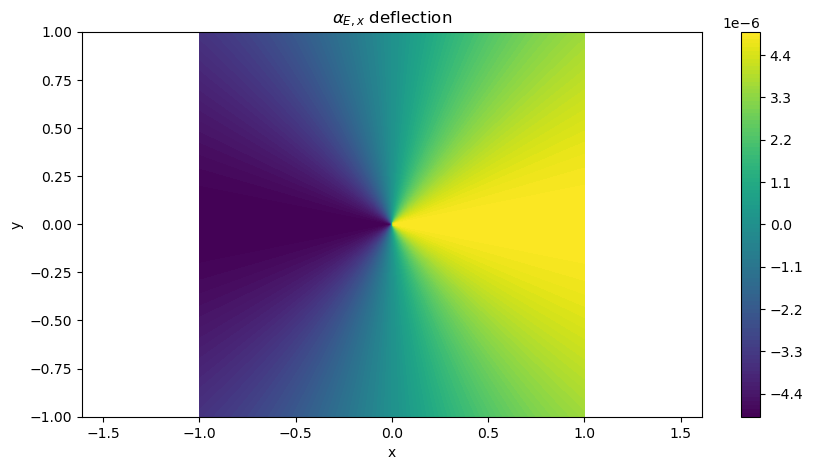

In [99]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[0], levels=100)
plt.title(r'$\alpha_{E,x}$ deflection')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.axis('equal')


(-1.0, 1.0, -1.0, 1.0)

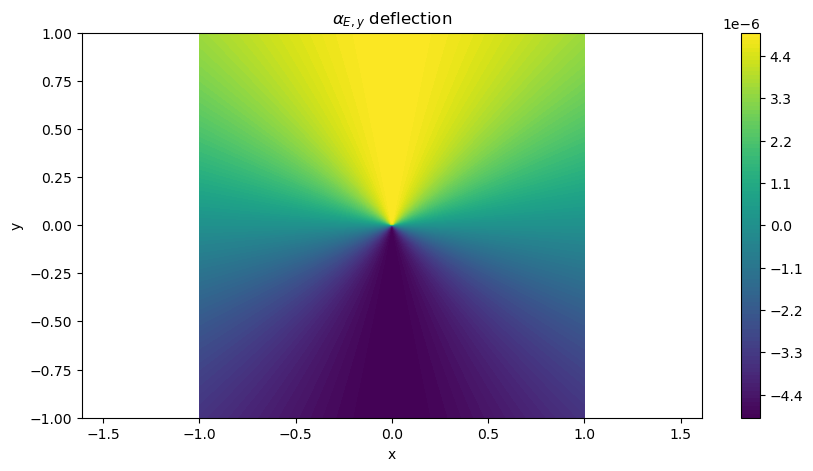

In [100]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[1], levels=100)
plt.title(r'$\alpha_{E,y}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

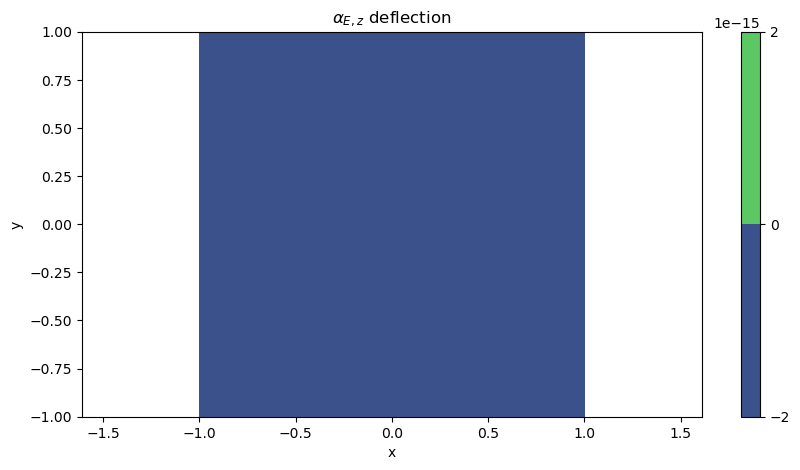

In [101]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[2], levels=100)
plt.title(r'$\alpha_{E,z}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

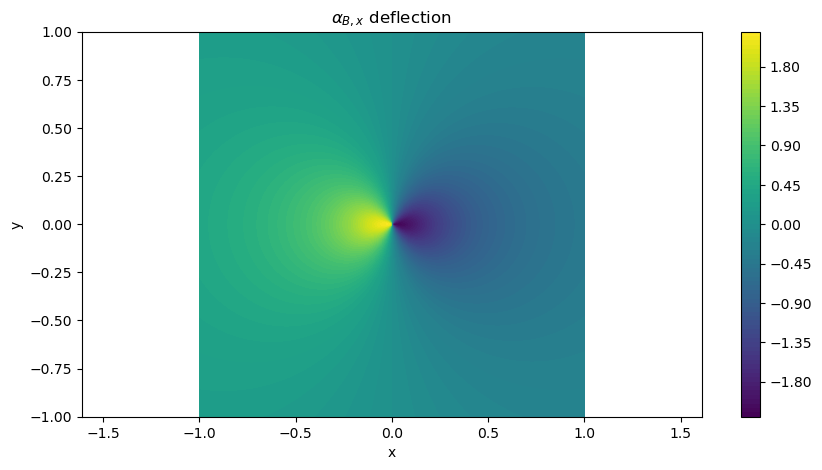

In [102]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[0], levels=100)
plt.title(r'$\alpha_{B,x}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

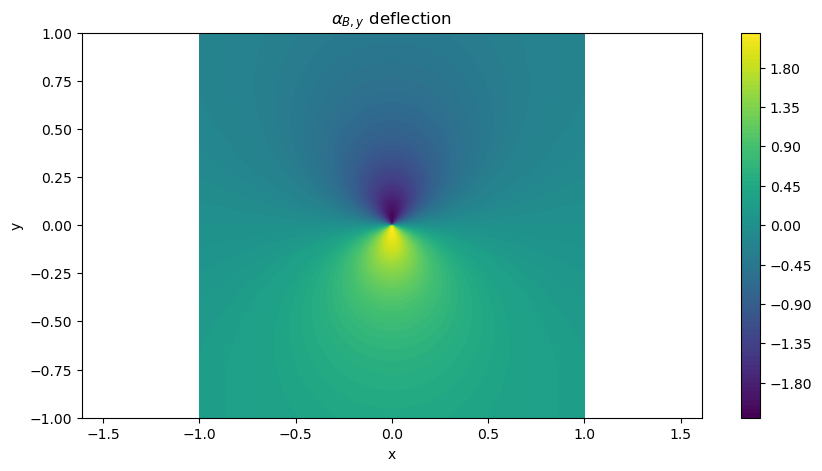

In [103]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[1], levels=100)
plt.title(r'$\alpha_{B,y}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

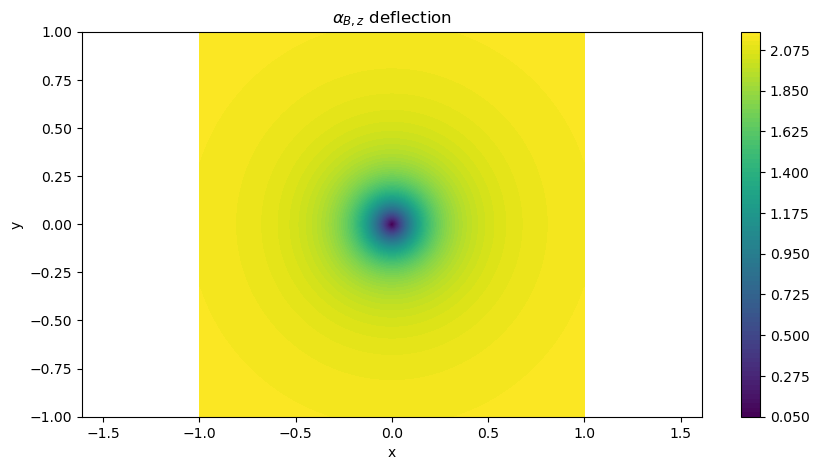

In [104]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[2], levels=100)
plt.title(r'$\alpha_{B,z}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

In [105]:
# New Fields section 
Ln = 0.1
LB = Ln/3
Ly = 1.2*Ln
B0 = 1
pi = np.pi

def B1(x,y):
    rv = np.array([x, y+Ly, 0])
    r = np.sqrt(x**2 + (y+Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        zhat = np.array([0,0,1])

        phi = pi*(Ln-r)/(2*LB)
        return B0*np.sin(phi)*np.cross(rv, zhat)
    else:
        return np.array([0,0,0])

def B2(x,y):
    rv = np.array([x, y-Ly, 0])
    r = np.sqrt(x**2 + (y-Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        zhat = np.array([0,0,1])

        phi = pi*(Ln-r)/(2*LB)
        return B0*np.sin(phi)*np.cross(rv, zhat)
    else:
        return np.array([0,0,0])

Bx1 = np.zeros_like(X)
By1 = np.zeros_like(X)

for ix in range(X.shape[0]):
    for iy in range(X.shape[1]):
        x = X[ix, iy]
        y = Y[ix, iy]

        Bx1[ix, iy] = B1(x,y)[0]
        By1[ix, iy] = B1(x,y)[1]







(-0.3, 0.3)

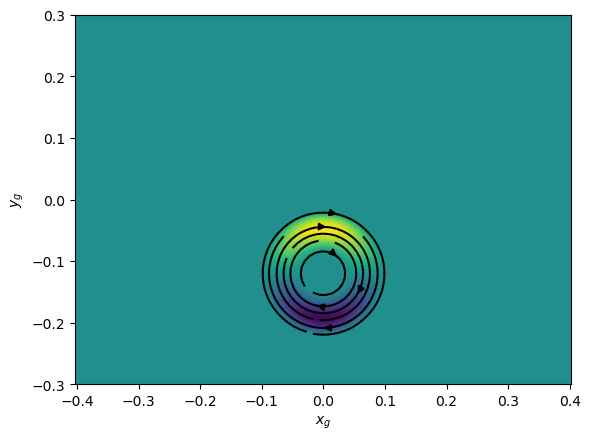

In [113]:
fig, axs = plt.subplots()
axs.contourf(X,Y,Bx1, levels=100)
axs.streamplot(X, Y, Bx1, By1, color='black', density=6)
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))

(-0.3, 0.3)

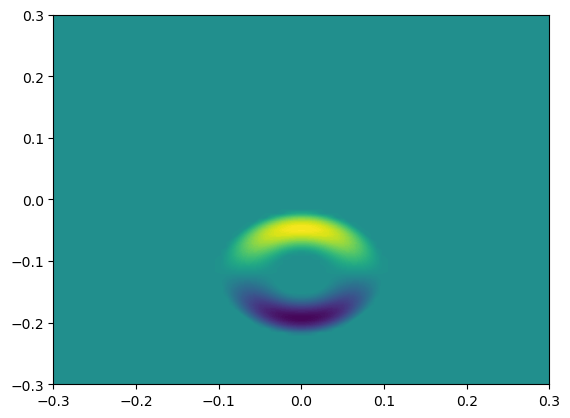

In [107]:
plt.contourf(X,Y,Bx1, levels=100)
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))